## Module - 0 - Notes

- Langchain made it easy to build LLM Applications , **Agents** are one of the popular LLM Applications, as we can do a lot with them & automate different types of tasks.

- We will be using [`Chat Models`](https://python.langchain.com/docs/concepts/chat_models/) - which do a few things `take a sequence of messages` as _inputs_ and _return_ `chat messages as outputs`.
- Langchain ecosystem currently provides following 3rd party integrations - here is the list of [Chat Models](https://python.langchain.com/docs/integrations/chat/)
- I will be using [ChatGoogleGenerativeAI](https://python.langchain.com/docs/integrations/chat/google_generative_ai/) by making use of GOOGLE_API_KEY(Have this in our `.env`) we get it from [here](https://aistudio.google.com/app/apikey)
- A common and recommended practice for managing environment variables locally is to use a `.env` file & Install the `python-dotenv` library - **!uv add python-dotenv** 


In [17]:
!uv add langchain-google-genai
!uv add python-dotenv

Resolved 95 packages in 1ms
Audited 89 packages in 0.07ms
Resolved 95 packages in 1ms
Audited 89 packages in 0.05ms


In [18]:
import os
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()

# Get the API key from the environment variable
google_api_key = os.environ.get('GOOGLE_API_KEY')

if google_api_key:
    print("Successfully loaded and retrieved the Google API key from the .env file.")
else:
    print("Could not find the 'GOOGLE_API_KEY' in the .env file or the environment.")

Successfully loaded and retrieved the Google API key from the .env file.


There are [a few standard parameters](https://python.langchain.com/docs/concepts/chat_models/#standard-parameters) that we can set with chat models. Two of the most common are:

- `model`: the name of the model
- `temperature`: the sampling temperature
- `Temperature` controls the randomness or creativity of the model's output where low temperature (close to 0) is more deterministic and focused outputs. This is good for tasks requiring accuracy or factual responses. High temperature (close to 1) is good for creative tasks or generating varied responses.

Chat models in LangChain have a number of [default methods](https://python.langchain.com/docs/concepts/chat_models/#key-methods). For the most part, we'll be using:

* `stream`: stream back chunks of the response
* `invoke`: call the chain on an input

And, as mentioned, chat models take [messages](https://python.langchain.com/docs/concepts/messages/) as input. `Messages have a role` (that `describes` **who** is saying the message) and a content property. We'll be talking a lot more about this later, but here let's just show the basics.

In [19]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,    
)

In [20]:
# Example on working with Messages

from langchain_core.messages import HumanMessage

# Create a message
msg = HumanMessage(content="Hello world", name="Abhishek")

# Message list
messages = [msg]

# Invoke the model with a list of messages 
llm.invoke(messages)

AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--16e4f8cc-8ddc-4dc9-aa0a-769350fef13e-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

We get an `AIMessage` response. Also, note that we can just invoke a chat model with a string. When a string is passed in as input, it is converted to a `HumanMessage` and then passed to the underlying model.


In [21]:
llm.invoke("who is virat kohli")

AIMessage(content="Virat Kohli is an Indian international cricketer and former captain of the Indian national cricket team. He is widely regarded as one of the greatest batsmen of all time. Here's a breakdown of his key aspects:\n\n*   **Cricketing Career:**\n    *   **Batsman:** Primarily a right-handed top-order batsman. Known for his aggressive batting style, consistency, and ability to perform under pressure.\n    *   **Captain:** He was the captain of the Indian cricket team across all three formats (Test, ODI, and T20I) for several years. He stepped down from captaincy in phases, concluding with Test captaincy in January 2022.\n    *   **Achievements:** Holds numerous records in cricket, including:\n        *   Most centuries in ODIs (One Day Internationals).\n        *   Fastest to reach various milestones in terms of runs scored in both ODIs and Tests.\n        *   Most runs in T20 Internationals.\n        *   Most player of the series awards in Test cricket.\n        *   Most 

- Search Tools

You'll also see [Tavily](https://app.tavily.com/home) in the README, which is a search engine optimized for LLMs and RAG, aimed at efficient, quick, and persistent search results. As mentioned, it's easy to sign up and offers a generous free tier. Some lessons (in Module 4) will use Tavily by default but, of course, other search tools can be used if you want to modify the code for yourself.

[TavilySearch API Reference](https://python.langchain.com/api_reference/tavily/tavily_search/langchain_tavily.tavily_search.TavilySearch.html#tavilysearch) - Tool that queries the Tavily Search API and gets back json.


In [22]:
!uv add langchain_community langchain-tavily

Resolved 95 packages in 1ms
Audited 89 packages in 0.05ms


In [23]:
import os
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()
# Get the TAVILY API key from the environment variable
tavily_api_key = os.environ.get("TAVILY_API_KEY")

if tavily_api_key:
    print("Successfully loaded and retrieved the TAVILY API key from the .env file.")
    
else:
    print("Could not find the 'TAVILY_API_KEY' in the .env file or the environment.")

Successfully loaded and retrieved the TAVILY API key from the .env file.


In [24]:
from langchain_tavily import TavilySearch
# Initialize the TavilySearch tool
tool = TavilySearch(
                max_results=1,
                topic="general",
                # include_answer=False,
                # include_raw_content=False,
                # include_images=False,
                # include_image_descriptions=False,
                # search_depth="basic",
                # time_range="day",
                # include_domains=None,
                # exclude_domains=None,
                # country=None
                # include_favicon=False
            )


In [25]:
tool.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.nytimes.com/athletic/live-blogs/wimbledon-2025-live-updates-day-6-scores-results/zEsDiYRO6bGB/',
   'title': 'Wimbledon 2025 live updates: Day 6 latest with Sinner on court ...',
   'content': "Play has resumed on the sixth day of the 2025 Wimbledon Championships after poor weather caused delays to this morning's matches. No. 1 Jannik",
   'score': 0.23283345,
   'raw_content': None}],
 'response_time': 0.83}

# Module - 1 - Notes

- understand how agents works in plain language & look into several general agentic architectures & common challenges faced by developers in building agents.
- Focus on why building custom agents with domain specific workflows and focus on high reliability is really important.
- Understand Langgraph's core abstractions - State , Nodes , Edges ..etc & discuss tools and messages which are core components of workflows that use chat models.
- Then understand `looping` in workflows/graphs & see how it enables the general `ReAct agent architecture`.
- we'll learn to add `memory` to our ReAct agent.
- Utilize langgraph studio - our desktop IDE for building and debugging agentic applications.

- How does LangGraph fit into the LangChain ecosystem? 
    - We aim to simplify every stage of the LLM application lifecycle.
    - Development: Build your applications using LangChain's open-source building blocks, components, and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.
    - Production: Use LangSmith to inspect, monitor and evaluate your chains, so that you can continuously optimize and deploy with confidence.
    - Deployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform.

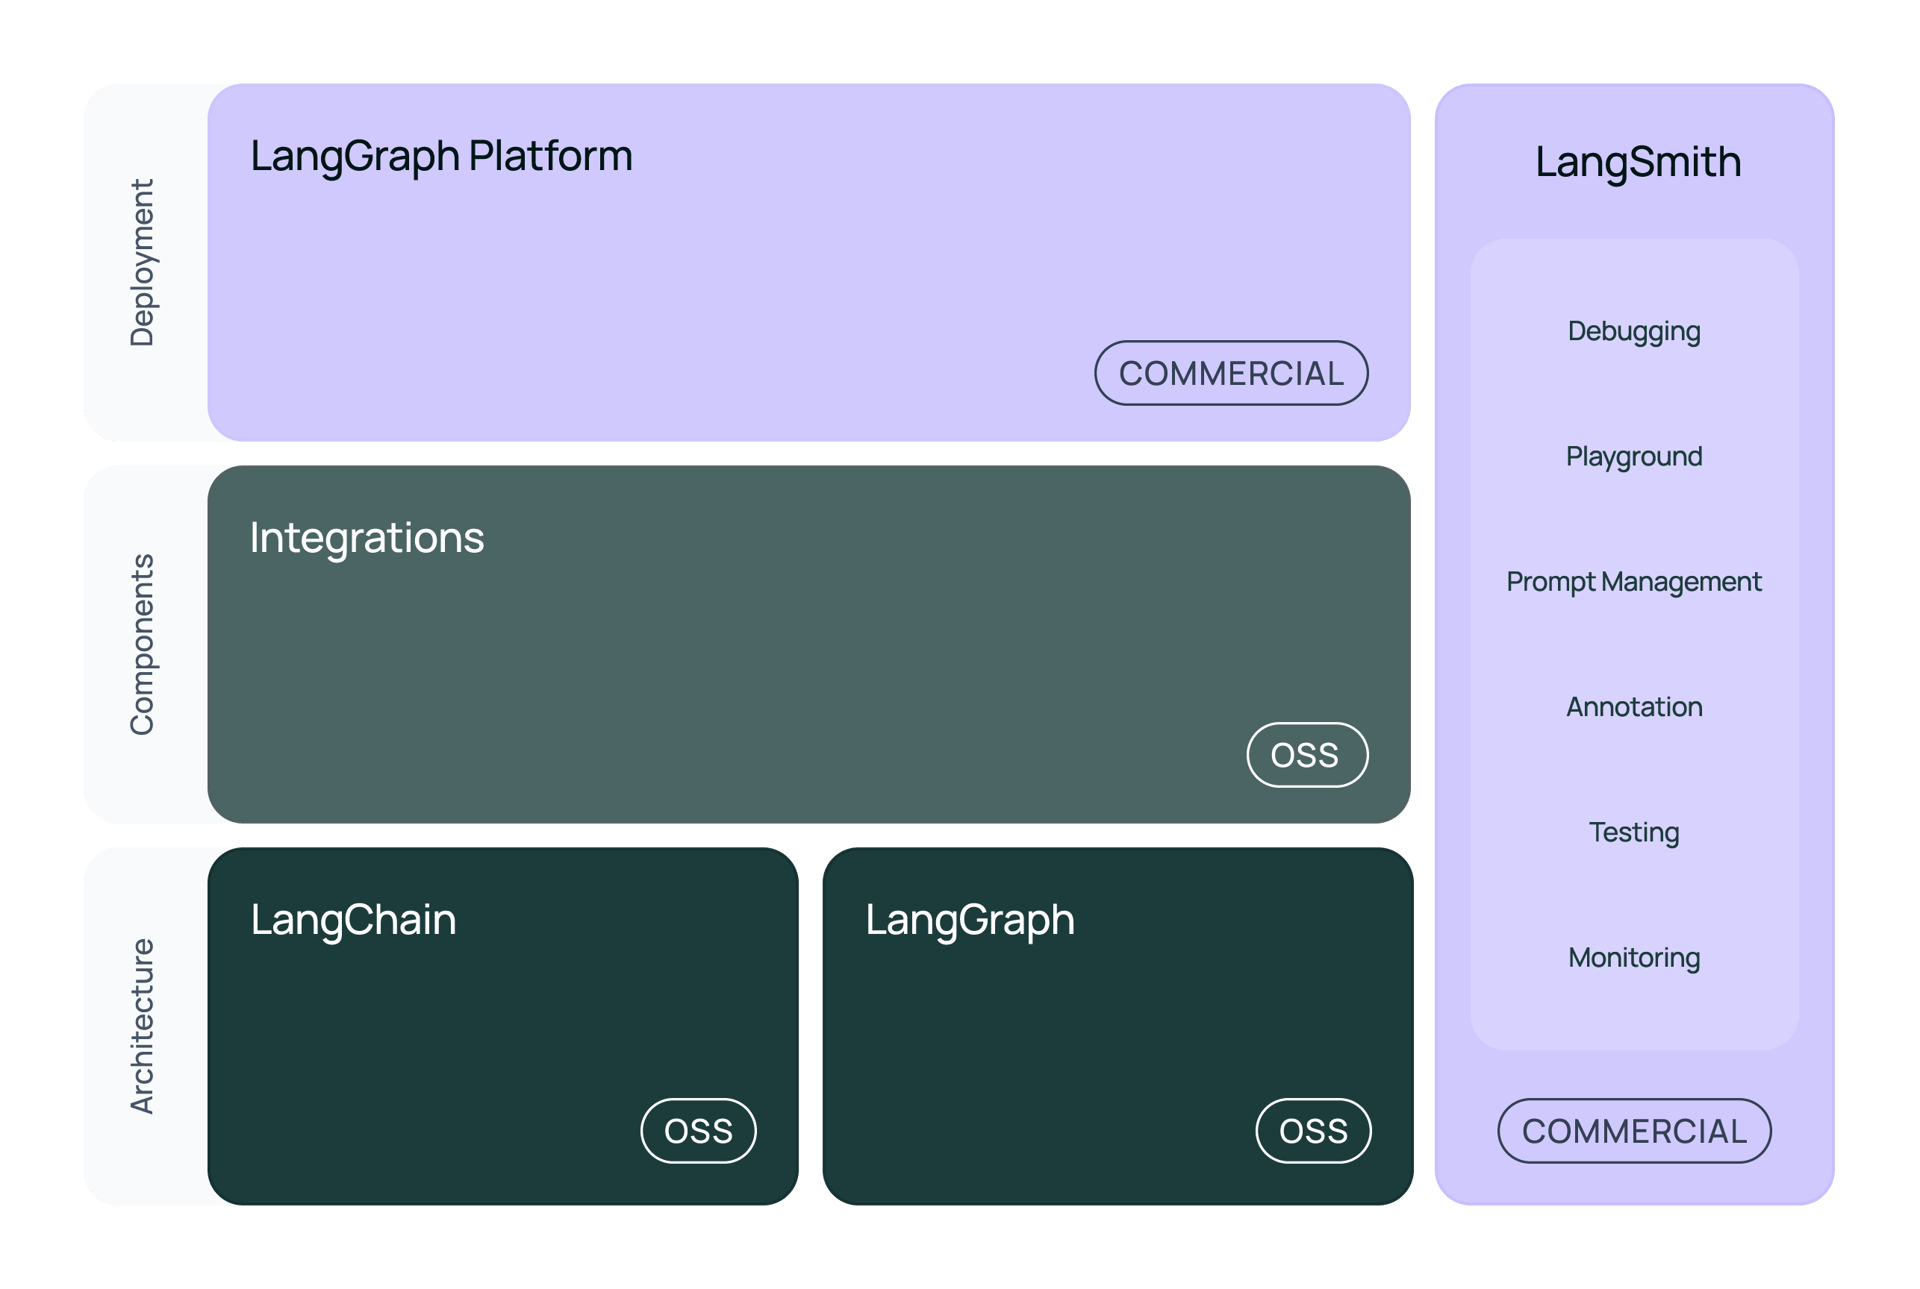

Go through PDF in Module-1 - as part of [Lesson-1 : motivation](https://github.com/abhimvp/Langgraph/blob/main/LangchainAcademyLangGraph/module-1/LangChain_Academy_-_Introduction_to_LangGraph_-_Motivation.pdf) before going ahead understand brief motivations for langgraph


- Agent ~= control flow defined by an LLM
- LangGraph - Express custom control flows as graphs
- LangGraph has Persistence , Streaming, Human-in-the-loop, Controllability - which are pillars of this framework.
- we can LangGraph Studio to visualize our graphs and play around and look at the control flow as well in our LangSmith traces.
- LangGraph plays very nicely with `LangChain( which provides us the integrations to LLMs. vector Stores`..etc), we often use this langChain components within our langGraph Workflow.
- But you don't have to use langChain with langGraph.
- In this module we will look at LangGraph Studio and go through core abstractions of langGraph and then build `Router` and `Agent with Memory` architectures.

- `Simple Graph:` Let's build a simple graph with 3 nodes and one conditional edge.

![Screenshot 2024-08-20 at 3.11.22 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dba5f465f6e9a2482ad935_simple-graph1.png)



- We `start` a Graph and we go to Node-1 and branches from 1 to 2,3 is known as `Conditional Edges` & then we go from 2 or 3 to `END`
- Now let's install `LangGraph`

In [1]:
!uv add langgraph

Resolved 101 packages in 995ms
Prepared 1 package in 162ms
Installed 6 packages in 63ms
 + langgraph==0.5.1
 + langgraph-checkpoint==2.1.0
 + langgraph-prebuilt==0.5.2
 + langgraph-sdk==0.1.72
 + ormsgpack==1.10.0
 + xxhash==3.5.0


- `State:` The first thing we need to do when we define a graph is to define the [state](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

- The State `schema` serves as the `input` schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

- A [TypedDict](https://typing.python.org/en/latest/spec/typeddict.html) type represents dictionary objects with a specific set of string keys, and with specific value types for each valid key. Each string key can be either required (it must be present) or non-required (it doesn’t need to exist).
- A TypedDict type can be defined using the class definition syntax with typing.TypedDict as the sole base class:

```py
from typing import TypedDict

class Movie(TypedDict):
    name: str
    year: int

```

- The `typing` module is Python's standard library for type hints, while `typing_extensions` provides backports of newer typing features for older Python versions and experimental types. Essentially, typing_extensions allows you to use features introduced in newer Python versions or proposed in new PEPs (Python Enhancement Proposals) even if your project is using an older Python version.


In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

- `Nodes:` Now next we need to define our Nodes, [Nodes](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes) are just python functions.

The `first positional argument` is the **state**, as defined above.

Because the state is a `TypedDict` with schema as defined above, each node can access the key, `graph_state`, with `state['graph_state']`.

Each node returns a new value of the state key `graph_state`.
  
By default, the new value returned by each node [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior state value.

In [3]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

- `Edges:` we use these to [Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) to connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

[Conditional Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#conditional-edges) are used if you want to *optionally* route between nodes.
 
`Conditional edges` are `implemented` as `functions` that return the next node to visit based upon some logic.


Here we Implement the logic of our conditional Edge:

In [4]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

## Graph Construction

Now, `we build` the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.
 
First, we `initialize` a `StateGraph` with the `State` class we defined above.
 
Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.
 
The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node. 

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure. 

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

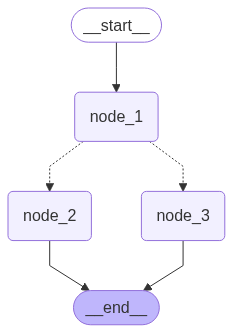

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
# Add nodes using add_node -> give node_name and the function
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

- `To Run the Graph` : `## Graph Invocation`

The compiled graph implements the [runnable](https://python.langchain.com/docs/concepts/runnables/) protocol.

This provides a standard way to execute LangChain components. 
 
`invoke` is one of the standard methods in this interface.

The input is a dictionary `{"graph_state": "Hi, this is lance."}`, which sets the initial value for our graph state dict.

When `invoke` is called, the graph starts execution from the `START` node.

It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.

The conditional edge will traverse from node `1` to node `2` or `3` using a 50/50 decision rule. 

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the `END` node.

In [9]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 3---


{'graph_state': 'Hi, this is Lance. I am sad!'}

`invoke` runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after `node_3` has completed: 

```
{'graph_state': 'Hi, this is Lance. I am sad!'}
```

Let's also work with `Studio`:
- Install following dependencies: 
langgraph
langgraph-prebuilt
langchain-core
langchain-community


In [10]:
!uv add langgraph langgraph-prebuilt langchain-core langchain-community

Resolved 101 packages in 674ms
Audited 95 packages in 2ms


Within each Module , we will have a `studio` folder & inside it we have bunch of python scripts - which indicate the various graphs we're working with in the studio.

- we can load this `studio` directory as a project in our langgraph studio.
- we need to have `Docker` running BTS.

LangGraph Studio is a custom IDE for viewing and testing agents.
Studio can be run locally and opened in your browser on Mac, Windows, and Linux.
See documentation [here](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/#local-development-server) on the local Studio development server.
Graphs for LangGraph Studio are in the module-x/studio/ folders.
To start the local development server, run the following command in your terminal in the /studio directory each module:

```bash
(LangchainAcademyLangGraph) 
abhis@Tinku MINGW64 ~/Desktop/Langgraph/Langgraph/LangchainAcademyLangGraph/module-1/studio (main)
$ langgraph dev
```

You should see the following output:

```bash
- 🚀 API: http://127.0.0.1:2024
- 🎨 Studio UI: https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
- 📚 API Docs: http://127.0.0.1:2024/docs

This in-memory server is designed for development and testing.
For production use, please use LangGraph Cloud.
```

Open your browser and navigate to the Studio UI: **https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024**.

To use Studio, you will need to create a .env file with the relevant API keys or have this code in your .py files which needs to access `.env` variables.

```py
import os
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()

# Get the API key from the environment variable
google_api_key = os.environ.get("GOOGLE_API_KEY")

if google_api_key:
    print("Successfully loaded and retrieved the Google API key from the .env file.")
else:
    print("Could not find the 'GOOGLE_API_KEY' in the .env file or the environment.")
```

Otherwise,Run this from the command line to create these files for module 1 to 5, as an example:

```bash
for i in {1..5}; do
  cp module-$i/studio/.env.example module-$i/studio/.env
  echo "OPENAI_API_KEY=\"$OPENAI_API_KEY\"" > module-$i/studio/.env
done
echo "TAVILY_API_KEY=\"$TAVILY_API_KEY\"" >> module-4/studio/.env
```


This is how it looks in our browser and give our inputs and see the outputs accordingly:

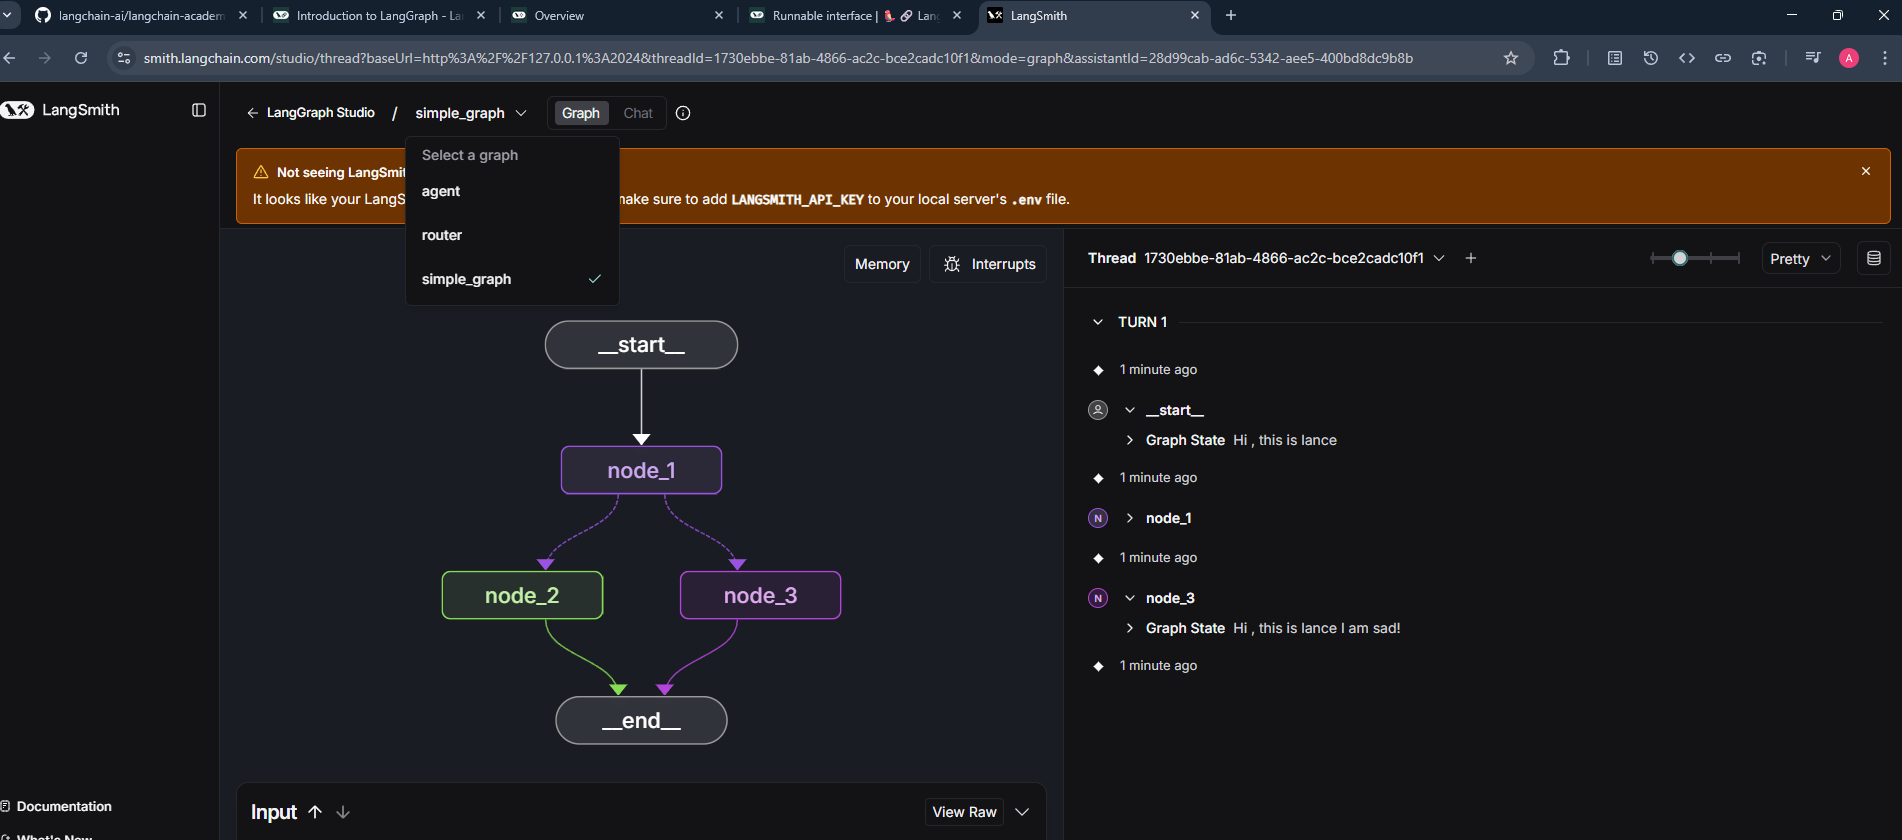

- One thing is that everytime we run a graph it creates a `Thread` and each run is associated with a `ThreadId`, we can view all the steps happened in each run by looking into that thread id in browser or studio UI.